In [67]:
import numpy as np
import matplotlib.pyplot as plt

# task1
from scipy.stats import binom

In [68]:
sampleCount = 500
sampleSizes = [50, 100, 500, 1000, 2500]
epsilon = 0.01
n = 4
theta = 1/5

In [69]:
mean, var = binom.stats(n, theta, moments = "mv")

In [70]:
estimates = np.zeros((sampleCount, len(sampleSizes)))

for i in range(sampleCount):
    for j, size in enumerate(sampleSizes):
        sample = binom.rvs(n, theta, size = size)
        estimates[i, j] = sample.mean() / n

Функция правдоподобия для биномиального распределения имеет вид: $$L(\theta) = \prod_{i=1}^{m} {n \choose X_i} \theta^{X_i} (1 - \theta)^{n - X_i}$$
Возьмём логарифм функции и продифференцируем его: $$\ln L(\theta) = \sum_{i=1}^{m} \ln {n \choose X_i} + X_i \ln \theta + (n - X_i) \ln (1 - \theta)$$
$$\frac{d \ln L(\theta)}{d \theta} = \sum_{i=1}^{m} \frac{X_i}{\theta} - \frac{n - X_i}{1 - \theta} = 0$$
Так как нам нужно найти максимум функции, приравняем производную к нулю, далее путём математических преобраазований сведём функцию к виду: $$n \overline{X} = \hat\theta n^2$$
И выразим из него оценку параметра $\hat\theta$: $$\hat\theta = \frac{\overline{X}}{n}$$

In [71]:
bias = np.mean(estimates, axis = 0) - theta
variance = np.var(estimates, axis = 0)
mse = np.std(estimates, axis = 0)
count = np.sum(np.abs(estimates - theta) > epsilon, axis = 0)

print(f"bias: {bias}")
print(f"variance: {variance}")
print(f"mean squared error: {mse}")
print(f"number of variation more than {epsilon}: {count}")

bias: [ 0.00033   -0.00038   -0.000257   0.000548  -0.0001296]
variance: [8.34441100e-04 3.93405600e-04 8.53634510e-05 4.06341960e-05
 1.53471638e-05]
mean squared error: [0.02888669 0.01983445 0.00923923 0.0063745  0.00391755]
number of variation more than 0.01: [365 311 136  69   4]


Для того чтобы определить смещение нам необходимо найти $E\hat\theta$. Для этого воспользуемся законом больших чисел:
$$E \hat\theta = E \frac{\overline{X_i}}{n} \xrightarrow{i \rightarrow \infty} \frac{n\theta}{n} = \theta$$
Поскольку $E \hat\theta - \theta = 0$, то наша оценка не смещена

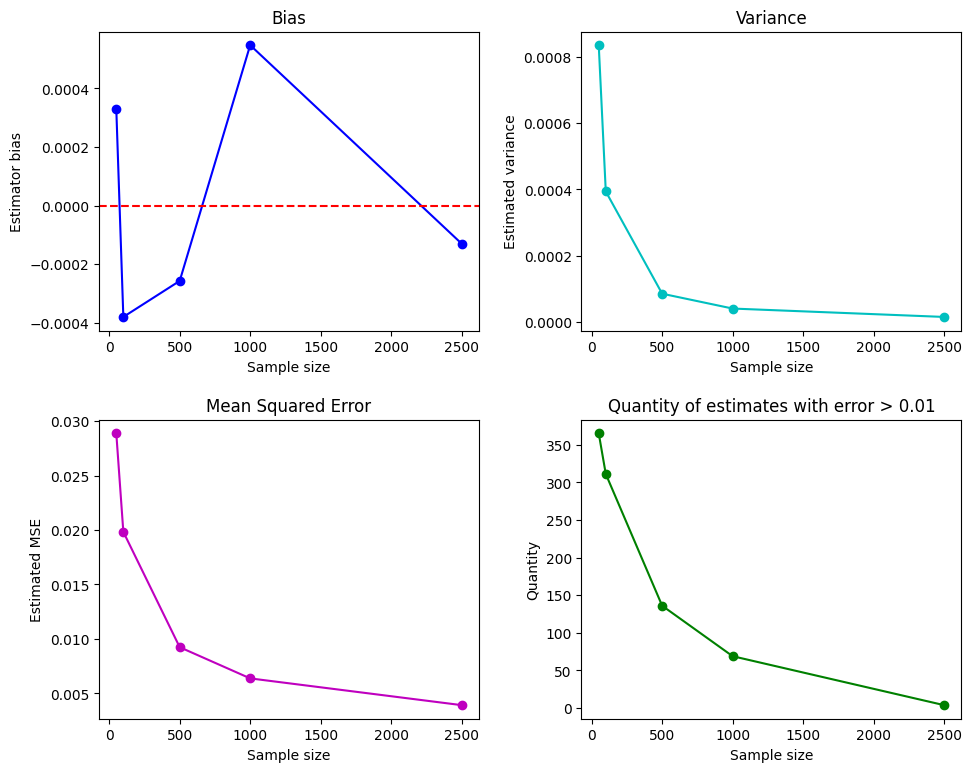

In [72]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.plot(sampleSizes, bias, "bo-")
plt.axhline(y = 0, color = "r", linestyle = "--")
plt.title("Bias")
plt.xlabel("Sample size")
plt.ylabel("Estimator bias")

plt.subplot(2, 2, 2)
plt.plot(sampleSizes, variance, "co-")
plt.title("Variance")
plt.xlabel("Sample size")
plt.ylabel("Estimated variance")

plt.subplot(2, 2, 3)
plt.plot(sampleSizes, mse, "mo-")
plt.title("Mean Squared Error")
plt.xlabel("Sample size")
plt.ylabel("Estimated MSE")

plt.subplot(2, 2, 4)
plt.plot(sampleSizes, count, "go-")
plt.title(f"Quantity of estimates with error > {epsilon}")
plt.xlabel("Sample size")
plt.ylabel("Quantity")

plt.tight_layout(pad = 1.7)
plt.show()